# Logistic Regression with a Neural Network mindset

**Problem Statement**: You are given a dataset ("data.h5") containing: - a training set of m_train images labeled as cat (y=1) or non-cat (y=0) - a test set of m_test images labeled as cat or non-cat - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from lr_utils import load_dataset
from torch import nn

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = tensor([1]), it's a 'cat' picture.


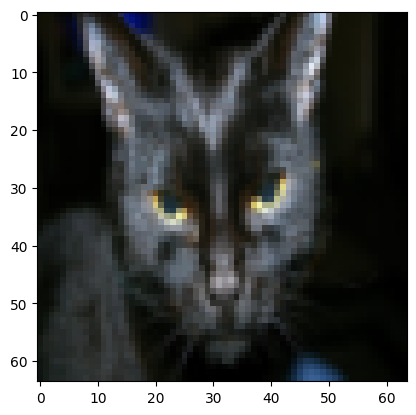

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print(
    "y = "
    + str(train_set_y[:, index])
    + ", it's a '"
    + classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
    + "' picture."
)

### Exercice 1


In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: torch.Size([209, 64, 64, 3])
train_set_y shape: torch.Size([1, 209])
test_set_x shape: torch.Size([50, 64, 64, 3])
test_set_y shape: torch.Size([1, 50])


### Exercice 2


In [24]:
train_set_x_flatten = train_set_x_orig.reshape((-1, num_px * num_px * 3))
test_set_x_flatten = test_set_x_orig.reshape((-1, num_px * num_px * 3))

assert torch.all(
    train_set_x_flatten[1, 0:10]
    == torch.tensor([196, 192, 190, 193, 186, 182, 188, 179, 174, 213])
), "Wrong solution. Use (X.shape[0], -1).T."

assert torch.all(
    test_set_x_flatten[1, 0:10]
    == torch.tensor([115, 110, 111, 137, 129, 129, 155, 146, 145, 159])
), "Wrong solution. Use (X.shape[0], -1).T."

In [25]:
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0

### Exercice 3


In [83]:
torch.sigmoid(torch.tensor([0, 2]))

tensor([0.5000, 0.8808])

### Exercice 4


In [84]:
dim = 2
linear = nn.Linear(2, 1)

w, b = list(linear.parameters())

print("w = " + str(w.data))
print("b = " + str(b.data))

w = tensor([[-0.4826, -0.6011]])
b = tensor([-0.3388])


### Exercice 5


In [85]:
def init_parameters(dim):
    return nn.Sequential(nn.Linear(dim, 1), nn.Sigmoid())

In [86]:
def propagate(model, loss_fn, X, Y):
    A = model(X)
    loss = loss_fn(A, Y.reshape(-1, 1).to(torch.float))
    return loss

### Exercice 6


In [87]:
def optimize(
    model,
    loss_fn,
    X,
    Y,
    num_iterations=100,
    learning_rate=0.009,
    print_cost=False,
):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    costs = []
    for i in range(num_iterations):
        optimizer.zero_grad()

        loss = propagate(model, loss_fn, X, Y)

        loss.backward()

        optimizer.step()

        if i % 100 == 0:
            costs.append(loss.item())

            if print_cost:
                print("Cost after iteration %i: %f" % (i, loss.item()))

    return costs

### Exercice 7


In [88]:
def predict(model, X):
    Y_prediction = model(X)
    return (Y_prediction > 0.5).to(torch.float)

In [89]:
print(
    "predictions = "
    + str(predict(init_parameters(test_set_x.shape[1]), test_set_x[:2]))
)

predictions = tensor([[0.],
        [0.]])


In [92]:
def model(
    X_train,
    Y_train,
    X_test,
    Y_test,
    num_iterations=2000,
    learning_rate=0.5,
    print_cost=False,
):
    model = init_parameters(X_train.shape[1])
    loss_fn = nn.BCELoss()
    costs = optimize(
        model, loss_fn, X_train, Y_train, num_iterations, learning_rate, print_cost
    )

    Y_prediction_test = predict(model, X_test)
    Y_prediction_train = predict(model, X_train)

    if print_cost:
        print(
            "train accuracy: {} %".format(
                100
                - torch.mean(torch.abs(Y_prediction_train - Y_train.reshape(-1, 1)))
                * 100
            )
        )
        print(
            "test accuracy: {} %".format(
                100
                - torch.mean(torch.abs(Y_prediction_test - Y_test.reshape(-1, 1))) * 100
            )
        )

    return model, costs, Y_prediction_test, Y_prediction_train

In [96]:
logistic_regression_model, costs, Y_prediction_test, Y_prediction_train = model(
    train_set_x,
    train_set_y,
    test_set_x,
    test_set_y,
    num_iterations=2000,
    learning_rate=0.005,
    print_cost=True,
)

Cost after iteration 0: 0.659454
Cost after iteration 100: 0.644000
Cost after iteration 200: 0.483252
Cost after iteration 300: 0.376238
Cost after iteration 400: 0.331113
Cost after iteration 500: 0.302982
Cost after iteration 600: 0.279634
Cost after iteration 700: 0.259831
Cost after iteration 800: 0.242756
Cost after iteration 900: 0.227839
Cost after iteration 1000: 0.214670
Cost after iteration 1100: 0.202941
Cost after iteration 1200: 0.192418
Cost after iteration 1300: 0.182915
Cost after iteration 1400: 0.174288
Cost after iteration 1500: 0.166417
Cost after iteration 1600: 0.159206
Cost after iteration 1700: 0.152573
Cost after iteration 1800: 0.146453
Cost after iteration 1900: 0.140787
train accuracy: 99.04306030273438 %
test accuracy: 70.0 %


y = tensor(1), you predicted that it is a "cat" picture.


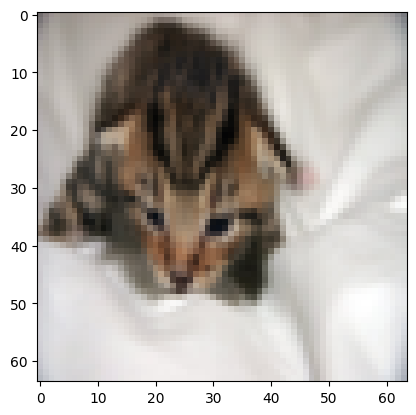

In [98]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[index, :].reshape((num_px, num_px, 3)))
print(
    "y = "
    + str(test_set_y[0, index])
    + ', you predicted that it is a "'
    + classes[int(Y_prediction_test[index, 0])].decode("utf-8")
    + '" picture.'
)

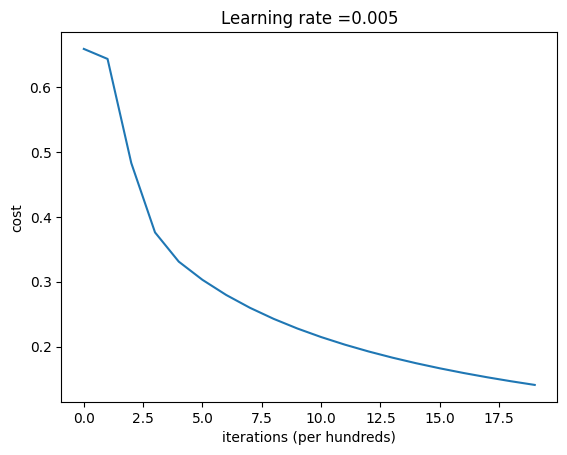

In [104]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations (per hundreds)")
plt.title("Learning rate =" + str(0.005))
plt.show()